In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
from tensorflow.keras.layers import *
from tensorflow.keras.models import *

In [7]:
import tensorflow as tf

In [8]:
df = pd.read_csv('../data/adult.txt', header=None, names = ['age', 'workclass','fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race'\
, 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', '50k'])
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,50k
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  50k             32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [14]:
df['50k'].value_counts()

 <=50K    24720
 >50K      7841
Name: 50k, dtype: int64

# deep learning model을 생성하고 학습 후 평가하시오..

In [38]:
# 타겟값 설정

y = df['50k'].apply(lambda x: 1 if x == ' >50K' else 0)
x = df.loc[:, :'native-country']

In [39]:
x

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States


In [40]:
x.shape # 14개 column

(32561, 14)

In [42]:
# 문자열을 one-hot벡터로 변경

x = pd.get_dummies(x)
x

,age,fnlwgt,education_num,capital-gain,capital-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,38,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32557,40,154374,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32558,58,151910,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32559,22,201490,9,0,0,20,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [22]:
# binary 지만 다른 카테고리도 가능
y_oh = tf.keras.utils.to_categorical(y)
y_oh

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y_oh, test_size=0.3, random_state=111)

In [24]:
# scaler 사용
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(x_train)

x_train_sc = scaler.transform(x_train)
x_test_sc = scaler.transform(x_test)

In [25]:
x_train.shape

(22792, 108)

In [27]:
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=108))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(56, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(28, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(2, activation='softmax'))  # multi_classification
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 256)               27904     
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 56)                7224      
                                                                 
 dropout_6 (Dropout)         (None, 56)                0         
                                                                 
 dense_8 (Dense)             (None, 28)               

In [28]:
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

In [29]:
hist = model.fit(x_train_sc, y_train, validation_split=0.2, epochs=100, batch_size=20)

Epoch 1/100
912/912 [==============================] - 6s 5ms/step - loss: 0.3901 - accuracy: 0.8207 - val_loss: 0.3197 - val_accuracy: 0.8484
Epoch 2/100
912/912 [==============================] - 4s 5ms/step - loss: 0.3425 - accuracy: 0.8446 - val_loss: 0.3129 - val_accuracy: 0.8550
Epoch 3/100
912/912 [==============================] - 4s 5ms/step - loss: 0.3312 - accuracy: 0.8498 - val_loss: 0.3096 - val_accuracy: 0.8541
Epoch 4/100
912/912 [==============================] - 4s 5ms/step - loss: 0.3283 - accuracy: 0.8503 - val_loss: 0.3105 - val_accuracy: 0.8585
Epoch 5/100
912/912 [==============================] - 5s 5ms/step - loss: 0.3162 - accuracy: 0.8545 - val_loss: 0.3058 - val_accuracy: 0.8557
Epoch 6/100
912/912 [==============================] - 4s 5ms/step - loss: 0.3163 - accuracy: 0.8557 - val_loss: 0.3032 - val_accuracy: 0.8585
Epoch 7/100
912/912 [==============================] - 5s 5ms/step - loss: 0.3136 - accuracy: 0.8583 - val_loss: 0.3013 - val_accuracy: 0.8585

Epoch 58/100
912/912 [==============================] - 5s 5ms/step - loss: 0.2332 - accuracy: 0.8898 - val_loss: 0.4630 - val_accuracy: 0.8478
Epoch 59/100
912/912 [==============================] - 5s 5ms/step - loss: 0.2325 - accuracy: 0.8922 - val_loss: 0.4185 - val_accuracy: 0.8480
Epoch 60/100
912/912 [==============================] - 5s 5ms/step - loss: 0.2302 - accuracy: 0.8896 - val_loss: 0.4514 - val_accuracy: 0.8476
Epoch 61/100
912/912 [==============================] - 5s 5ms/step - loss: 0.2312 - accuracy: 0.8904 - val_loss: 0.4131 - val_accuracy: 0.8480
Epoch 62/100
912/912 [==============================] - 5s 5ms/step - loss: 0.2309 - accuracy: 0.8893 - val_loss: 0.3856 - val_accuracy: 0.8506
Epoch 63/100
912/912 [==============================] - 5s 5ms/step - loss: 0.2325 - accuracy: 0.8928 - val_loss: 0.3853 - val_accuracy: 0.8495
Epoch 64/100
912/912 [==============================] - 5s 5ms/step - loss: 0.2278 - accuracy: 0.8924 - val_loss: 0.4085 - val_accuracy:

In [33]:
model.evaluate(x_test_sc, y_test)

306/306 [==============================] - 1s 3ms/step - loss: 0.5783 - accuracy: 0.8416


[0.5782514810562134, 0.841641902923584]

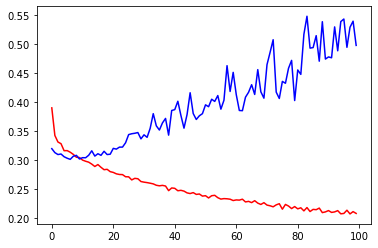

In [34]:
plt.plot(hist.history['loss'], c='r')
plt.plot(hist.history['val_loss'], c='b')

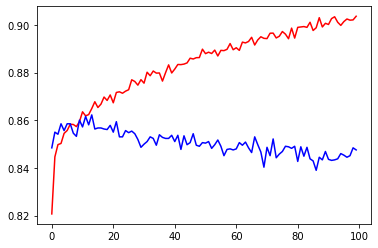

In [35]:
plt.plot(hist.history['accuracy'], c='r')
plt.plot(hist.history['val_accuracy'], c='b')

# machine learning 모델과 비교..

In [36]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
rfc.score(x_test, y_test)

0.8481932644078206